In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [2]:
data = pd.read_csv('merged_anti_india_dataset.csv')
data

,text,label,source
0,Nice buro yes I am Hussain khan is me happy ow...,0.0,indo_hate_speech_excel
1,@hussainkhansadab teri maa chodate,1.0,indo_hate_speech_excel
2,@hussainkhansadab mohhamad and allah mi maa ki...,1.0,indo_hate_speech_excel
3,@hussainkhansadab Teri maka bhosda lose nikalo...,0.0,indo_hate_speech_excel
4,Send me,0.0,indo_hate_speech_excel
...,...,...,...
107709,@kaushikcbasu Cong ruled for 60 +yrs at center...,NaN,tweets_csv
107710,@ARYSabirShakir @OfficialDGISPR It's indian lo...,NaN,tweets_csv
107711,@Schandillia A true leader puts the team in fr...,NaN,tweets_csv
107712,Now' Rahul Gandhi is Mahanayak of INDIA. Regar...,NaN,tweets_csv


# EDA

In [3]:
data.head()

,text,label,source
0,Nice buro yes I am Hussain khan is me happy ow...,0.0,indo_hate_speech_excel
1,@hussainkhansadab teri maa chodate,1.0,indo_hate_speech_excel
2,@hussainkhansadab mohhamad and allah mi maa ki...,1.0,indo_hate_speech_excel
3,@hussainkhansadab Teri maka bhosda lose nikalo...,0.0,indo_hate_speech_excel
4,Send me,0.0,indo_hate_speech_excel


In [4]:
data.tail()

,text,label,source
107709,@kaushikcbasu Cong ruled for 60 +yrs at center...,NaN,tweets_csv
107710,@ARYSabirShakir @OfficialDGISPR It's indian lo...,NaN,tweets_csv
107711,@Schandillia A true leader puts the team in fr...,NaN,tweets_csv
107712,Now' Rahul Gandhi is Mahanayak of INDIA. Regar...,NaN,tweets_csv
107713,@MajorPoonia New low in indian politics. If yo...,NaN,tweets_csv


In [5]:
data.shape

(107714, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107714 entries, 0 to 107713
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   text    107713 non-null  object 
 1   label   58149 non-null   float64
 2   source  107714 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.5+ MB


In [7]:
data.dtypes

text       object
label     float64
source     object
dtype: object

In [8]:
data.describe()

,label
count,58149.000000
mean,0.172935
std,0.378194
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,58149.0,0.172935,0.378194,0.0,0.0,0.0,0.0,1.0


In [10]:
data['label'].value_counts()

label
0.0    48093
1.0    10056
Name: count, dtype: int64

In [11]:
data['label'].unique()

array([ 0.,  1., nan])

# Plot distribution

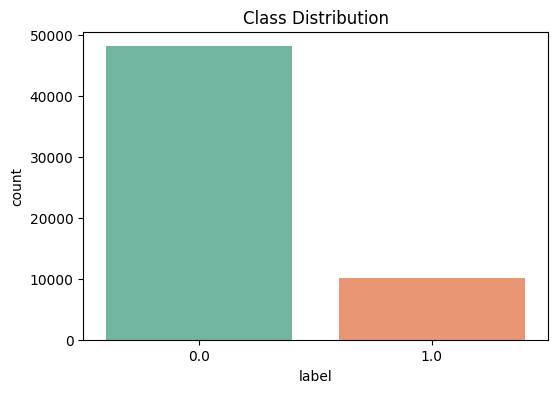

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=data, palette="Set2")
plt.title("Class Distribution")
plt.show()

# Word count per text

In [13]:
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

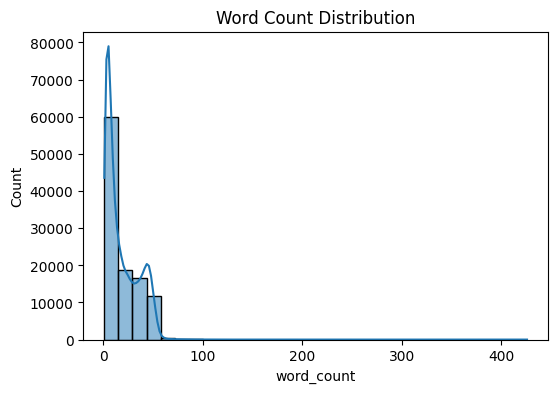

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(data['word_count'], bins=30, kde=True)
plt.title("Word Count Distribution")
plt.show()

# Most frequent words in Hate vs Non-Hate

In [15]:
from wordcloud import WordCloud

In [16]:
hate_text = " ".join(data[data['label'] == 1]['text'].dropna().astype(str))
non_hate_text = " ".join(data[data['label'] == 0]['text'].dropna().astype(str))

# Plot for Hate-Speech

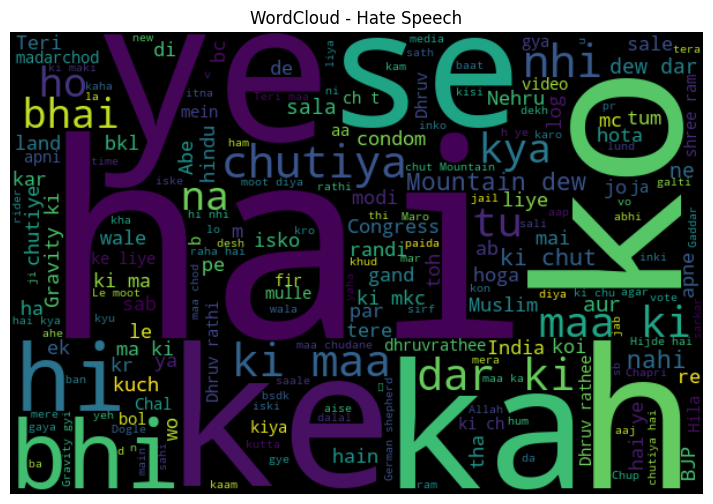

In [17]:
plt.figure(figsize=(12,6))
wc_hate = WordCloud(width=600, height=400, background_color='black').generate(hate_text)
plt.imshow(wc_hate, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Hate Speech")
plt.show()

# Plot for Non-Hate Speech

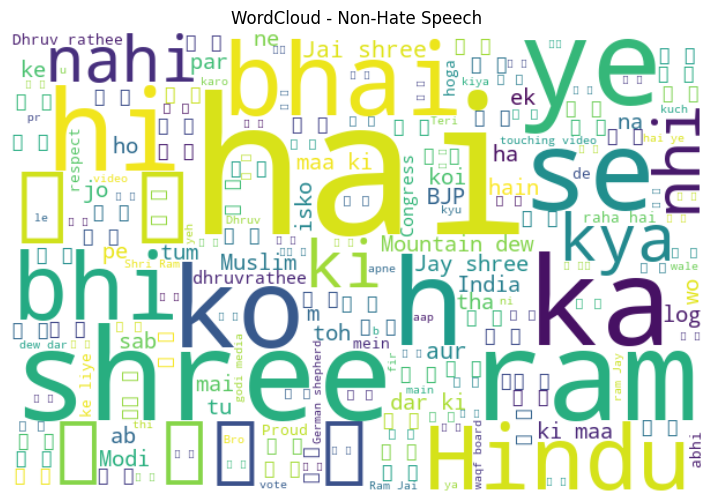

In [18]:
plt.figure(figsize=(12,6))
wc_non = WordCloud(width=600, height=400, background_color='white').generate(non_hate_text)
plt.imshow(wc_non, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Non-Hate Speech")
plt.show()

# Text Preprocessing 

In [19]:
import nltk


In [20]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Text Cleaning

In [21]:
import re
import string
import unicodedata

In [22]:
def clean_text(text):
    text = str(text).lower()
    text = unicodedata.normalize("NFKD", text)   # ✅ normalize Unicode junk like ðŸ
    text = re.sub(r"http\\S+|www\\S+", "", text) # remove links
    text = re.sub(r"@\\w+|#", "", text)          # remove mentions, hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

data["clean_text"] = data["text"].astype(str).apply(clean_text)

# Preview


In [23]:
print(data[['text', 'clean_text']].head())

                                                text  \
0  Nice buro yes I am Hussain khan is me happy ow...   
1                 @hussainkhansadab teri maa chodate   
2  @hussainkhansadab mohhamad and allah mi maa ki...   
3  @hussainkhansadab Teri maka bhosda lose nikalo...   
4                                            Send me   

                                          clean_text  
0  nice buro yes i am hussain khan is me happy ow...  
1                  hussainkhansadab teri maa chodate  
2  hussainkhansadab mohhamad and allah mi maa ki ...  
3  hussainkhansadab teri maka bhosda lose nikalo ...  
4                                            send me  


# Define X and Y

In [24]:
X = data['clean_text']
y = data['label']

In [25]:
print(y.isnull().sum())

49565


In [26]:
y = y.fillna(y.mode()[0])# Fill missing labels with the mode
y

0         0.0
1         1.0
2         1.0
3         0.0
4         0.0
         ... 
107709    0.0
107710    0.0
107711    0.0
107712    0.0
107713    0.0
Name: label, Length: 107714, dtype: float64

In [27]:
y.unique()

array([0., 1.])

# Tf - IDF Vectorizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion

In [29]:
char_vect = TfidfVectorizer(
    analyzer="char",
    ngram_range=(3,5),           # great for slang variants
    min_df=2,
    sublinear_tf=True
)
word_vect = TfidfVectorizer(
    analyzer="word",
    ngram_range=(1,2),           # unigrams+bigrams
    min_df=2,
    max_features=40000,
    sublinear_tf=True
)

vectorizer = FeatureUnion([
    ("char", char_vect),
    ("word", word_vect),
])

X_vec = vectorizer.fit_transform(X)


# Train - Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42, stratify=y)

#  Models

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000,
    class_weight="balanced",
    n_jobs=-1,
    C=2.0,
    solver="liblinear"  # robust for sparse + class_weight
    ),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=40, class_weight="balanced_subsample", n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(max_depth=40, class_weight="balanced", random_state=42)
}

In [33]:
best_model = None
best_acc = 0

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    acc = (y_pred == y_test).mean()
    if acc > best_acc:
        best_acc = acc
        best_model = model

Training Logistic Regression...
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96     19532
         1.0       0.61      0.87      0.72      2011

    accuracy                           0.94     21543
   macro avg       0.80      0.91      0.84     21543
weighted avg       0.95      0.94      0.94     21543

Training Random Forest...
              precision    recall  f1-score   support

         0.0       0.99      0.63      0.77     19532
         1.0       0.21      0.97      0.35      2011

    accuracy                           0.66     21543
   macro avg       0.60      0.80      0.56     21543
weighted avg       0.92      0.66      0.73     21543

Training Decision Tree...
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95     19532
         1.0       0.52      0.73      0.61      2011

    accuracy                           0.91     21543
   macro avg       0.75      0.83      0.78 

In [36]:
# Simple abusive lexicon (expand as needed)
abuse_words = {"madar", "chod", "bc", "mc", "bhosdi", "chutiya", "harami"}

def contains_abuse(text):
    tokens = text.lower().split()
    return any(tok in abuse_words for tok in tokens)


#  Save best model 

In [37]:
import pickle

In [38]:
with open("hate_speech_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [39]:
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)